In [522]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [523]:
dataset = pd.read_csv('Marketing_PersonalLoan_Data_1.csv')
dataset.head()

,ID,ZIP Code,Gender,Age,Education,Experience,Family,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,A_1385,94110,F,64,3,40,2,8,0.3,0,0,0,1,0,0
1,A_827,92104,M,64,3,39,3,8,0.1,87,0,0,0,1,0
2,A_728,94618,F,63,2,37,1,8,0.8,97,0,0,1,0,0
3,A_200,95060,F,52,1,28,1,8,0.3,0,0,0,1,0,0
4,A_1175,94960,M,40,2,15,2,8,0.1,0,0,0,0,0,0


In [524]:
print("Shape of Data:",dataset.shape)
r, c = dataset.shape
print("Number of Rows:",r)
print("Number of Columns:",c)

Shape of Data: (2000, 15)
Number of Rows: 2000
Number of Columns: 15


Brief description about the data:
The data set includes 2000 observations with 15 variables divided into 4 different measurement categories.

-The BINARY category has five variables, including the target variable personal loan, also securities account, CD account, online banking and credit card.

-The interval category contains five variables: age, experience, income, CC avg and mortgage.

-The ordinal category includes the variables family and education.

-The last category is nominal with ID and Zip code.

In [525]:
print("Columns of the Dataset:\n")
print(dataset.columns)

Columns of the Dataset:

Index(['ID', 'ZIP Code', 'Gender', 'Age', 'Education', 'Experience', 'Family',
       'Income', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Personal Loan'],
      dtype='object')


In [526]:
print("Null values in Dataset(if any):\n", dataset.isnull().sum())

Null values in Dataset(if any):
 ID                    0
ZIP Code              0
Gender                0
Age                   0
Education             0
Experience            0
Family                0
Income                0
CCAvg                 0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


In [527]:
print("Number of Duplicate values:", dataset.duplicated().sum())

Number of Duplicate values: 0


In [528]:
print("Information of the Dataset:\n", dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2000 non-null   object 
 1   ZIP Code            2000 non-null   int64  
 2   Gender              2000 non-null   object 
 3   Age                 2000 non-null   int64  
 4   Education           2000 non-null   int64  
 5   Experience          2000 non-null   int64  
 6   Family              2000 non-null   int64  
 7   Income              2000 non-null   int64  
 8   CCAvg               2000 non-null   float64
 9   Mortgage            2000 non-null   int64  
 10  Securities Account  2000 non-null   int64  
 11  CD Account          2000 non-null   int64  
 12  Online              2000 non-null   int64  
 13  CreditCard          2000 non-null   int64  
 14  Personal Loan       2000 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 234.5

In [529]:
newdataset = dataset.iloc[:,3:]
newdataset

,Age,Education,Experience,Family,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,64,3,40,2,8,0.30,0,0,0,1,0,0
1,64,3,39,3,8,0.10,87,0,0,0,1,0
2,63,2,37,1,8,0.80,97,0,0,1,0,0
3,52,1,28,1,8,0.30,0,0,0,1,0,0
4,40,2,15,2,8,0.10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,43,2,16,1,201,10.00,0,0,0,0,1,1
1996,27,1,3,1,201,6.33,158,0,0,1,0,0
1997,35,3,5,1,203,10.00,0,0,0,0,0,1
1998,30,1,4,2,204,4.50,0,0,0,1,0,0


In [530]:
#newdataset['b_sex'] = newdataset['Gender'].apply(lambda x: 0 if x == 'F' else 1)
#newdataset.drop(['Gender'], axis=1, inplace=True)
#newdataset.head()

In [531]:
newdataset.describe()

,Age,Education,Experience,Family,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.556500,1.882000,20.328000,2.371500,74.607500,1.947045,60.98700,0.106500,0.062000,0.594000,0.288500,0.101000
std,11.373851,0.838109,11.383067,1.145052,46.963989,1.783623,105.73523,0.308554,0.241216,0.491207,0.453178,0.301404
min,23.000000,1.000000,-3.000000,1.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,1.000000,10.750000,1.000000,38.000000,0.700000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,20.000000,2.000000,64.000000,1.500000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,3.000000,30.000000,3.000000,102.250000,2.600000,106.00000,0.000000,0.000000,1.000000,1.000000,0.000000
max,67.000000,3.000000,43.000000,4.000000,205.000000,10.000000,635.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Here, we can see that in dataset description the min value of 'Experience' column is -3 but we know that value for this column should be positive. 
So, we will remove the negative values by using mean function on this column.

In [532]:
newdataset.Experience = abs(newdataset.Experience)
newdataset

,Age,Education,Experience,Family,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,64,3,40,2,8,0.30,0,0,0,1,0,0
1,64,3,39,3,8,0.10,87,0,0,0,1,0
2,63,2,37,1,8,0.80,97,0,0,1,0,0
3,52,1,28,1,8,0.30,0,0,0,1,0,0
4,40,2,15,2,8,0.10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,43,2,16,1,201,10.00,0,0,0,0,1,1
1996,27,1,3,1,201,6.33,158,0,0,1,0,0
1997,35,3,5,1,203,10.00,0,0,0,0,0,1
1998,30,1,4,2,204,4.50,0,0,0,1,0,0


**We will convert the CCAvg from monthly average to annual average like Income column.**

In [533]:
newdataset['CCAvg'] = newdataset['CCAvg'] * 12
newdataset

,Age,Education,Experience,Family,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,64,3,40,2,8,3.60,0,0,0,1,0,0
1,64,3,39,3,8,1.20,87,0,0,0,1,0
2,63,2,37,1,8,9.60,97,0,0,1,0,0
3,52,1,28,1,8,3.60,0,0,0,1,0,0
4,40,2,15,2,8,1.20,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,43,2,16,1,201,120.00,0,0,0,0,1,1
1996,27,1,3,1,201,75.96,158,0,0,1,0,0
1997,35,3,5,1,203,120.00,0,0,0,0,0,1
1998,30,1,4,2,204,54.00,0,0,0,1,0,0


In [534]:
newdataset.describe()

,Age,Education,Experience,Family,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.556500,1.882000,20.355000,2.371500,74.607500,23.364540,60.98700,0.106500,0.062000,0.594000,0.288500,0.101000
std,11.373851,0.838109,11.334691,1.145052,46.963989,21.403478,105.73523,0.308554,0.241216,0.491207,0.453178,0.301404
min,23.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,1.000000,10.750000,1.000000,38.000000,8.400000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,20.000000,2.000000,64.000000,18.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,3.000000,30.000000,3.000000,102.250000,31.200000,106.00000,0.000000,0.000000,1.000000,1.000000,0.000000
max,67.000000,3.000000,43.000000,4.000000,205.000000,120.000000,635.00000,1.000000,1.000000,1.000000,1.000000,1.000000


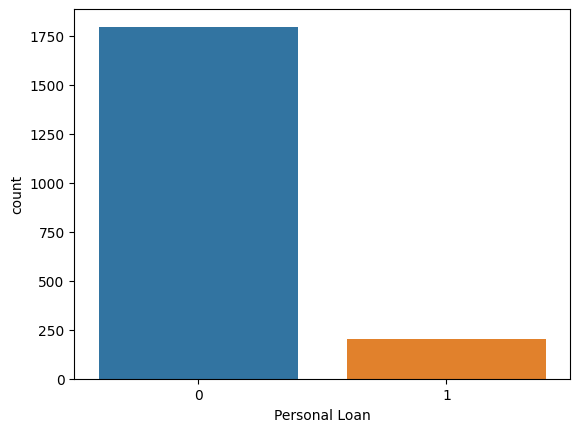

In [535]:
plt.figure()
sns.countplot(x = 'Personal Loan', data = newdataset)
plt.show()

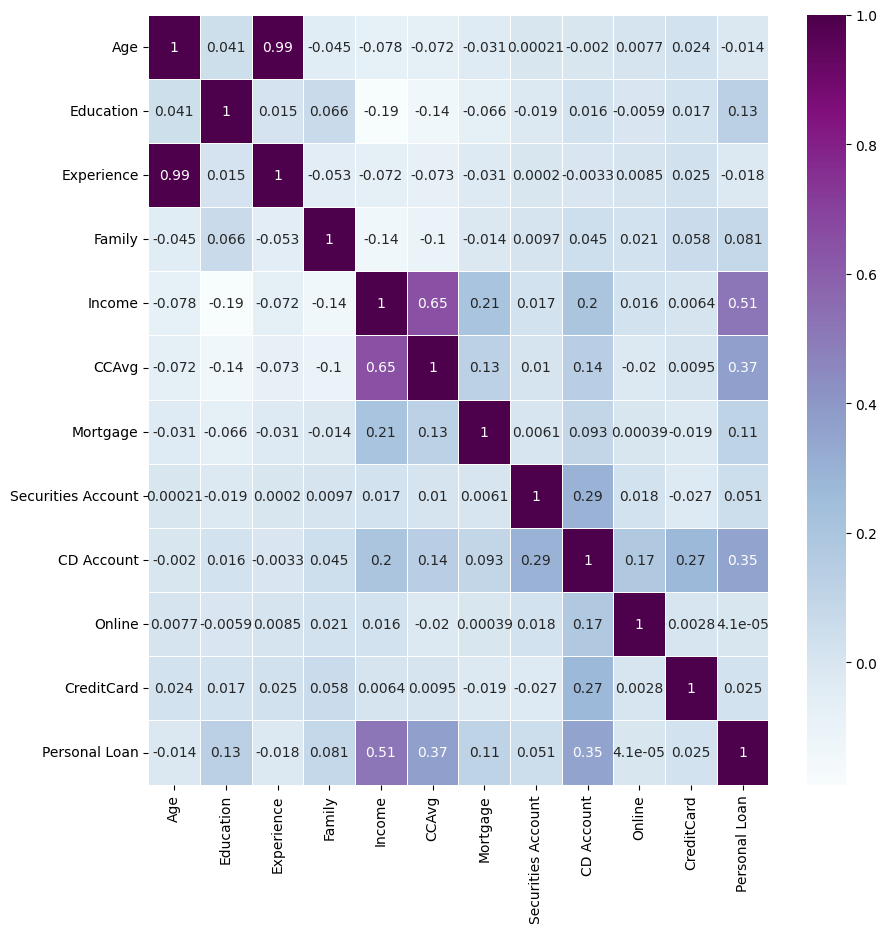

In [536]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(newdataset.corr(), cmap='BuPu', cbar=True, annot=True, linewidths=0.5,ax=ax)
plt.show()

**Observations:**
1. (Age' and 'Experience') and ('Income' and ‘CCAvg') are correlated with each other.
2. 'CD Account' has a correlation with 'Credit Card', 'Securities Account', 'Online', ‘CCAvg' and 'Income'.
3. 'Personal Loan' has correlation with 'Experience', 'Income’, 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
4. 'Mortgage' has moderate correlation with 'Income'
5. 'Income' influences ‘ann_CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

<AxesSubplot: xlabel='Age', ylabel='Income'>

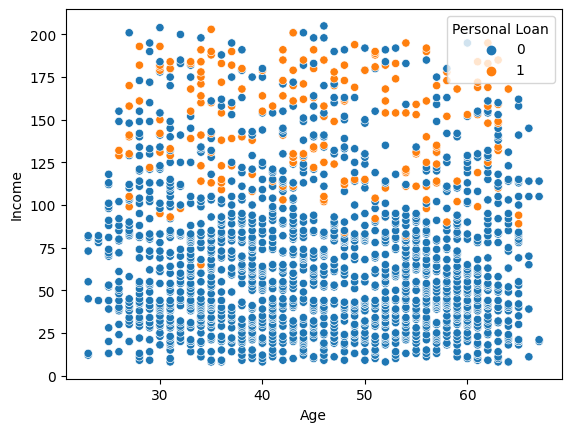

In [537]:
sns.scatterplot(x = 'Age', y = 'Income', data = newdataset, hue = 'Personal Loan')

**=> In the above given graph, clients with income more than 100k are more likely to get loan.**

<AxesSubplot: xlabel='Experience', ylabel='Income'>

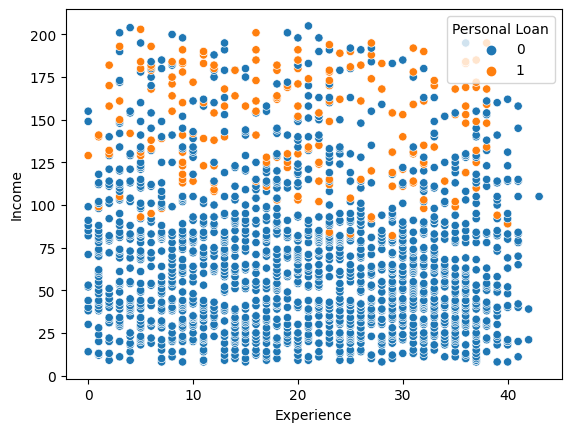

In [538]:
sns.scatterplot(x = 'Experience', y = 'Income', data = newdataset, hue = 'Personal Loan')

**=> From the above graph, it is observed that clients with income more than 100k are more likely to get loan.**

<AxesSubplot: xlabel='Age', ylabel='CCAvg'>

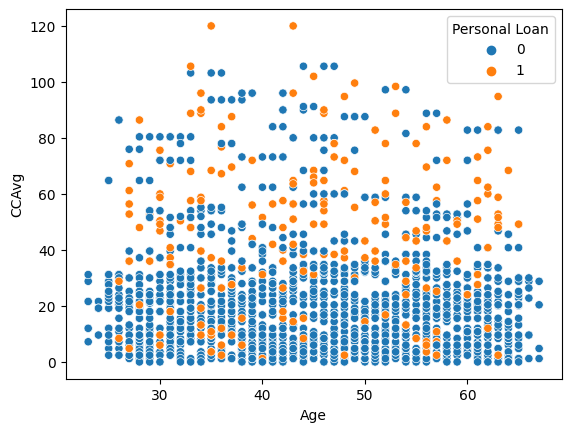

In [539]:
sns.scatterplot(x = 'Age', y = 'CCAvg', data = newdataset, hue = 'Personal Loan')

**=> From the graph shown above, it is observed that clients with annual CCAvg more than 35 are more likely to get loan.**

In [540]:
#sns.countplot(x = 'b_sex', hue = 'Personal Loan', data = newdataset)

<AxesSubplot: xlabel='Family', ylabel='count'>

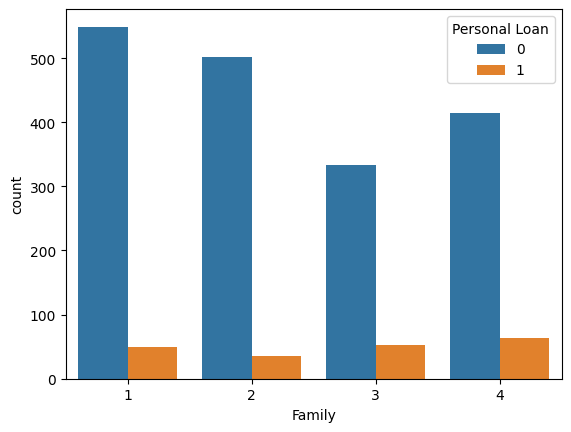

In [541]:
sns.countplot(x = 'Family', hue = 'Personal Loan', data = newdataset)

<AxesSubplot: xlabel='Experience', ylabel='count'>

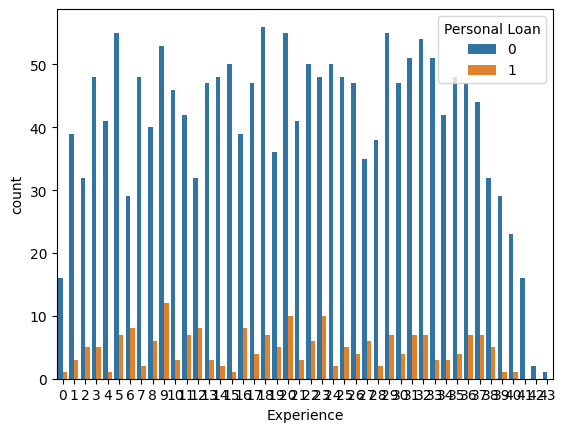

In [542]:
sns.countplot(x = 'Experience', hue = 'Personal Loan', data = newdataset)

**=> Here, we can see in previous three graph the Family, b_sex and Experience has a low effect in the personal loan attribute.**

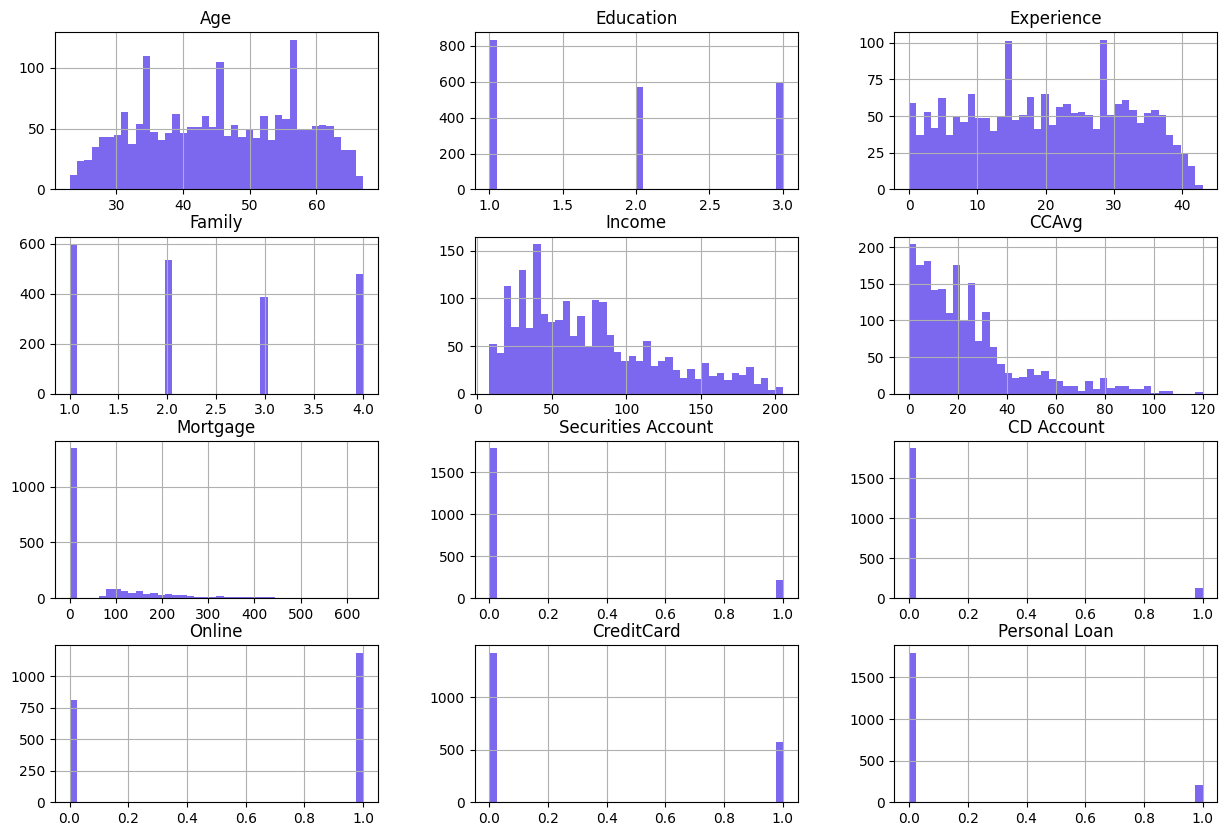

In [543]:
newdataset.hist(bins=40, figsize=(15,10), color='mediumslateblue')
plt.show()

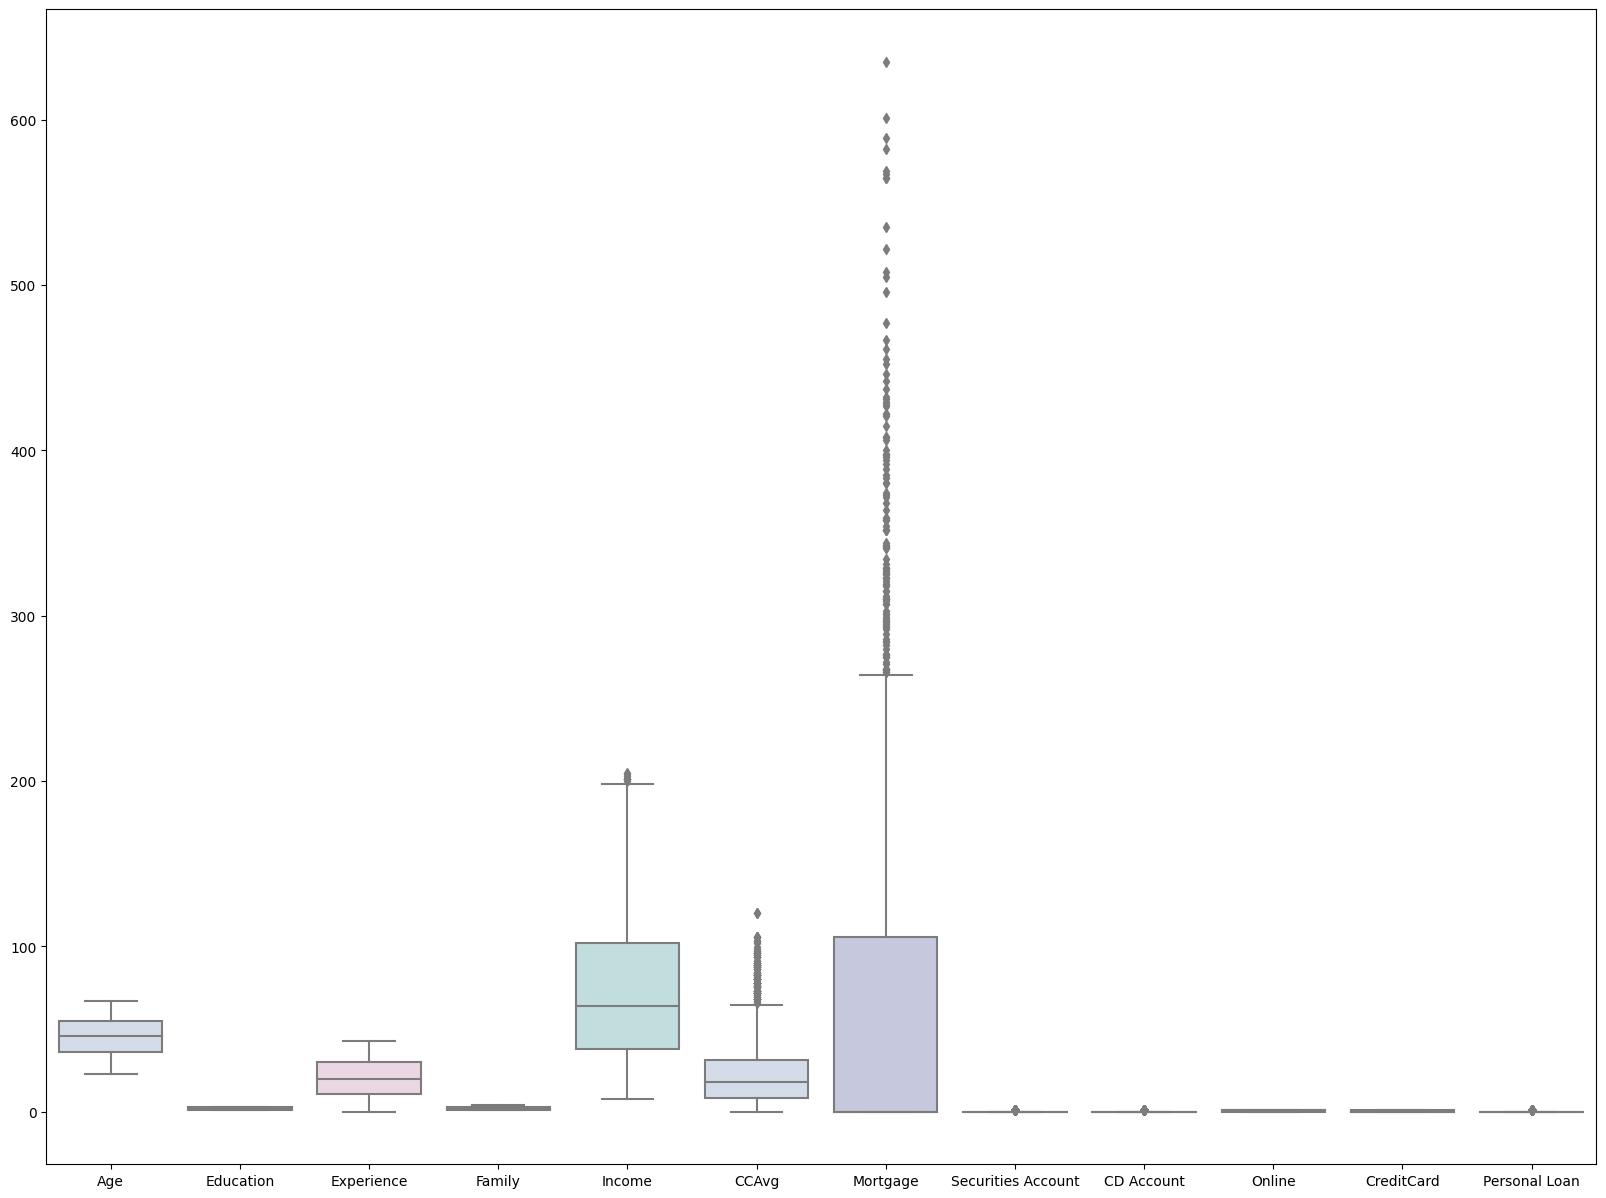

In [544]:
#Detecting outliers
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,15))
sns.boxplot(data = newdataset,palette = colours)
plt.xticks(rotation=0)
plt.show()

In [545]:
newdataset['Mortgage'][newdataset['Mortgage']>=150] = newdataset['Mortgage'].mean()
newdataset['Income'][newdataset['Income']>=198] = newdataset['Income'].mean()
newdataset['CCAvg'][newdataset['CCAvg']>=50] = newdataset['Income'].median()

C:\Users\megha\AppData\Local\Temp\ipykernel_35036\2314507010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset['Mortgage'][newdataset['Mortgage']>=150] = newdataset['Mortgage'].mean()
C:\Users\megha\AppData\Local\Temp\ipykernel_35036\2314507010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset['Income'][newdataset['Income']>=198] = newdataset['Income'].mean()
C:\Users\megha\AppData\Local\Temp\ipykernel_35036\2314507010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [546]:
newdataset.isnull().sum()

Age                   0
Education             0
Experience            0
Family                0
Income                0
CCAvg                 0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

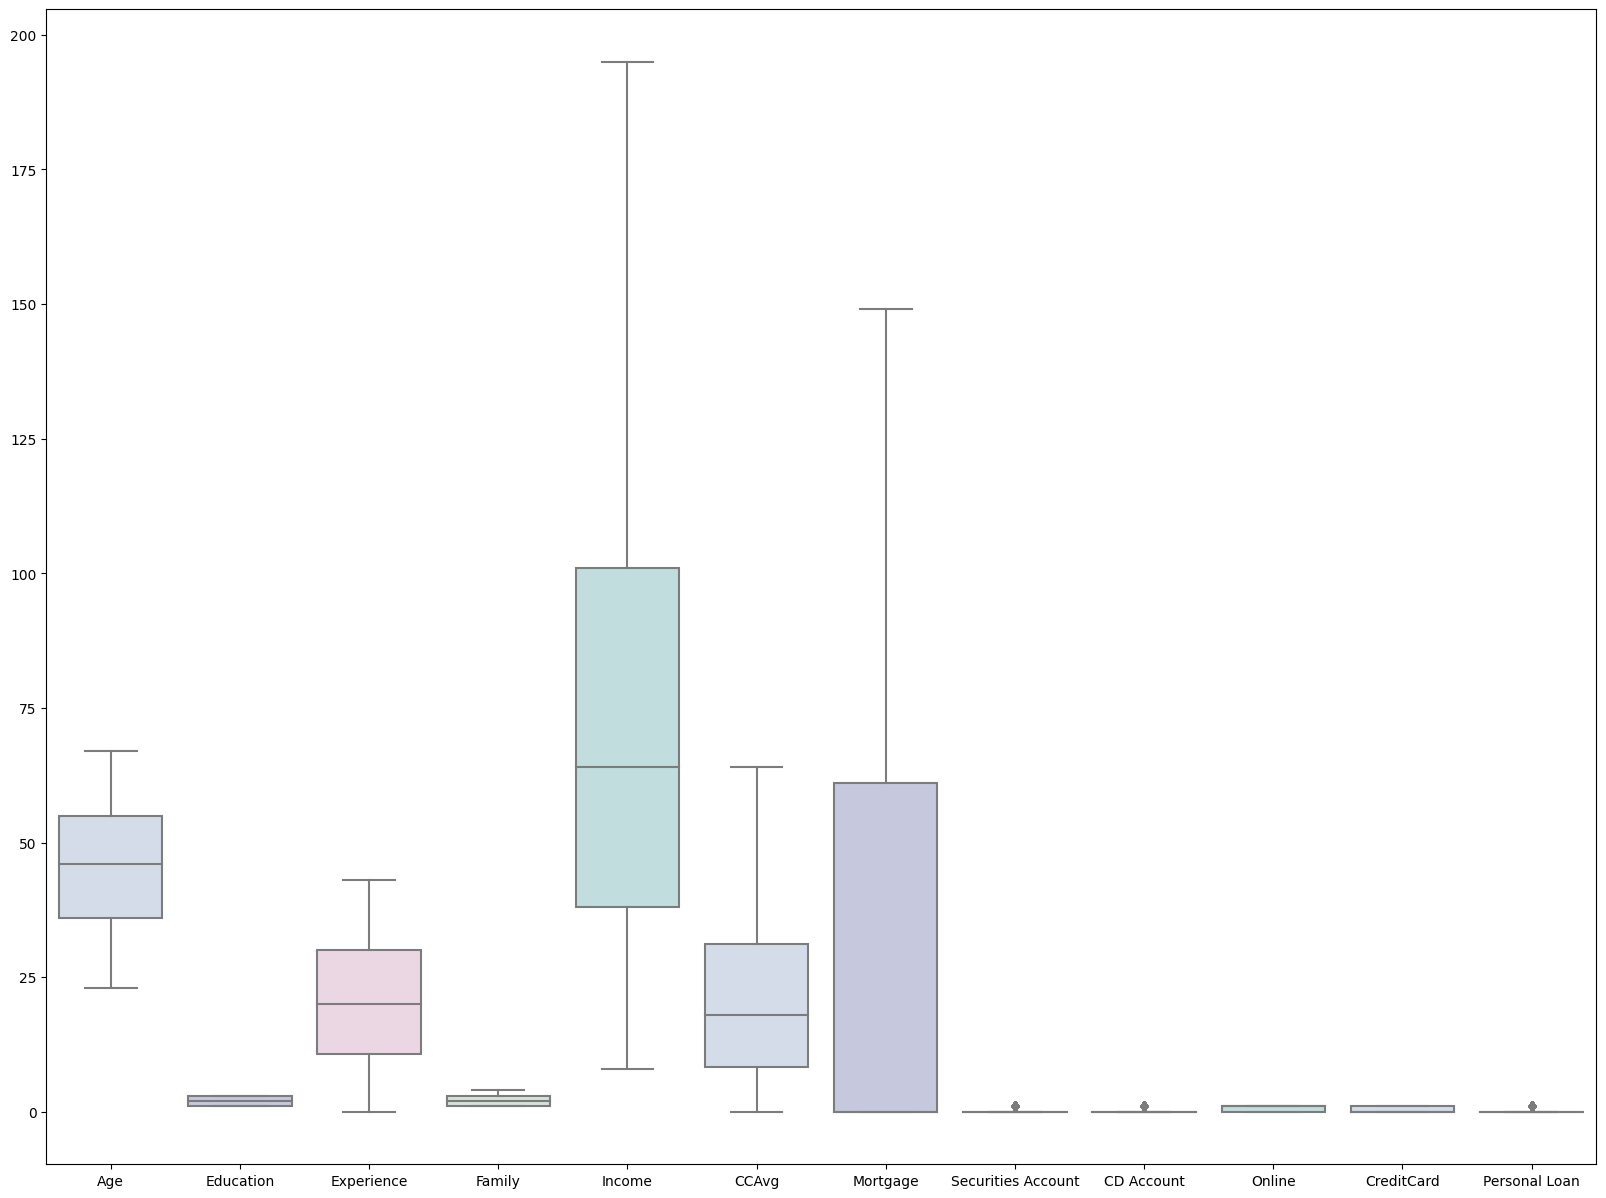

In [547]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,15))
sns.boxplot(data = newdataset,palette = colours)
plt.xticks(rotation=0)
plt.show()

In [548]:
# Data is split in two variable X, Y where X takes all the features except the one that need to be predicted
# and Y takes the feature which is needs to be predicted
X = newdataset.iloc[:, :11]
Y = newdataset.iloc[:, 11]
# Data is split into train and test method where the training is given to 80% of data and then tested on 20% of data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [549]:
# After applying the StandardScaler function, all the features will have a mean of 0 and a standard deviation of 1. 
# This standardization process ensures that the features are on the same scale and will be equally weighted in the model.
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


In [550]:
import math
math.sqrt(len(Y_test))

20.0

In [551]:
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

In [552]:
Y_pred = classifier.predict(x_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**

These four outcomes are summarized in a confusion matrix given below.

Cofusion Matrix: 
 [[355   4]
 [ 16  25]]

True Positives(TP):  355
True Negatives(TN):  25
False Positives(FP):  16
False Negatives(FN):  4

CORRECT PREDICTIONS:  380
INCORRECT PREDICTIONS:  20


<AxesSubplot: >

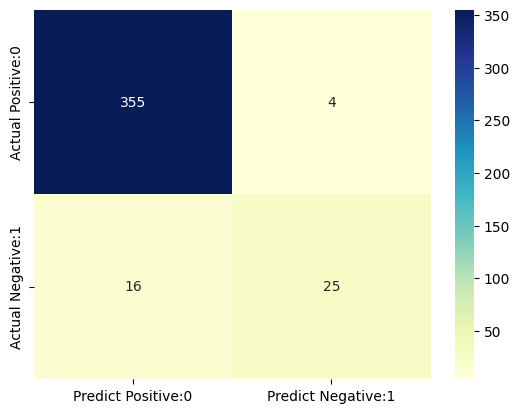

In [553]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Cofusion Matrix: \n",conf_matrix)
print('\nTrue Positives(TP): ', conf_matrix[0,0])
print('True Negatives(TN): ', conf_matrix[1,1])
print('False Positives(FP): ', conf_matrix[1,0])
print('False Negatives(FN): ', conf_matrix[0,1])
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[1,0]
FN = conf_matrix[0,1]
print("\nCORRECT PREDICTIONS: ",TP+TN)
print("INCORRECT PREDICTIONS: ",FP+FN)
cm_matrix = pd.DataFrame(data=conf_matrix, index=['Actual Positive:0', 'Actual Negative:1'], 
                                 columns=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Precision

**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 

So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.



In [554]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.3f}'.format(precision))

Precision : 0.957


### Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.

**Recall** identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.



In [555]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.3f}'.format(recall))

Recall or Sensitivity : 0.989


### F1-Score

**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.

In [556]:
print("\nF1 Score for the model is: {0:0.2f}".format(f1_score(Y_test, Y_pred)))


F1 Score for the model is: 0.71


### Accuracy Score

In [557]:
print('Accuracy score for the model is: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Accuracy score for the model is: 0.9500


In [558]:
# The model is tested on a newly created dataframe.
predict_df = pd.DataFrame({'Experience':[30],
                           'Age':[67],
                          'Income':[208],
                          'Family':[4],
                          'CCAvg':[3.67],
                          'Education':[3],
                          'Mortgage':[301],
                          'Securities Account':[1],
                          'CD Account':[1],
                          'Online':[1],
                          'CreditCard':[1]})

new_prediction = scaler.fit_transform(predict_df)
new_prediction

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [559]:
#Result of K-NN prediction
print('Prediction with K-nn model:', classifier.predict(new_prediction))

Prediction with K-nn model: [0]
